In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2485993216119789805
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4189650944
locality {
  bus_id: 1
  links {
  }
}
incarnation: 577074776514624225
physical_device_desc: "device: 0, name: GeForce GTX 1660 SUPER, pci bus id: 0000:01:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [3]:
cd 노지 작물 해충 진단 이미지

H:\노지 작물 해충 진단 이미지


In [4]:
ls

 H 드라이브의 볼륨: One Touch
 볼륨 일련 번호: 5074-B445

 H:\노지 작물 해충 진단 이미지 디렉터리

2022-04-07  오후 03:21    <DIR>          .
2022-04-07  오후 03:21    <DIR>          ..
2022-04-07  오후 05:29    <DIR>          Training
2022-04-08  오전 12:55    <DIR>          Validation
               0개 파일                   0 바이트
               4개 디렉터리  1,251,471,290,368 바이트 남음


In [5]:
import os
import pickle
import json
import time
import pandas as pd
import cv2

from glob import glob
from tqdm import tqdm

import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [6]:
print(f"train image 수 : {len(glob('./Training/images/*/*.jpg')):,}")
print(f"train image 수 : {len(glob('./Training/images/*/*.jpeg')):,}")
print(f"train label 수 : {len(glob('./Training/labels/*/*.json')):,}")

train image 수 : 355,146
train image 수 : 79,093
train label 수 : 437,290


In [7]:
print(f"valid image 수 : {len(glob('./Validation/images/*/*.jpg')):,}")
print(f"valid image 수 : {len(glob('./Validation/images/*/*.jpeg')):,}")
print(f"valid label 수 : {len(glob('./Validation/labels/*/*.json')):,}")

valid image 수 : 898
valid image 수 : 15,216
valid label 수 : 16,114


In [79]:
# Train data
start_time = time.time()
tr_json_list = glob('./Training/labels/*/*.json')
print(f"seconds : {time.time() - start_time}")

KeyboardInterrupt: 

In [15]:
# Valid data
start_time = time.time()
tr_json_list_vd = glob('./Validation/labels/*/*.json')
print(f"seconds : {time.time() - start_time}")

seconds : 1.6116912364959717


In [52]:
# Train data
for i, json_file in enumerate(tqdm(tr_json_list)):
    with open(json_file, 'r') as f:
        json_file = json.load(f)
    json_file_re = {
        '파일이름' : json_file['description']['image'],
        '촬영일자' : json_file['description']['date'],
        'height' : json_file['description']['height'],
        'width' : json_file['description']['width'],
        '과제번호' : json_file['description']['task'],
        '촬영유형코드' : json_file['description']['type'],
        '질병/해충코드' : json_file['annotations']['object'][0]['class'],
        '작물코드' : json_file['annotations']['crop'],
        '촬영부위코드' : json_file['annotations']['area'],
        '작물생육코드' : json_file['annotations']['object'][0]['grow'],
        '해충피해코드' : json_file['annotations']['risk'],
        'BoundingBox' : json_file['annotations']['object'][0]['points']
    }
    if i == 0:
        tr_json_df = pd.json_normalize(json_file_re)
    else:
        tr_json_df = pd.concat([tr_json_df, pd.json_normalize(json_file_re)])

tr_json_df = tr_json_df.reset_index(drop=True)

100%|████████████████████████████████████████████████████████████████████████| 437290/437290 [5:42:54<00:00, 21.25it/s]


In [53]:
# Valid data
for i, json_file in enumerate(tqdm(tr_json_list_vd)):
    with open(json_file, 'r') as f:
        json_file = json.load(f)
    json_file_re = {
        '파일이름' : json_file['description']['image'],
        '촬영일자' : json_file['description']['date'],
        'height' : json_file['description']['height'],
        'width' : json_file['description']['width'],
        '과제번호' : json_file['description']['task'],
        '촬영유형코드' : json_file['description']['type'],
        '질병/해충코드' : json_file['annotations']['object'][0]['class'],
        '작물코드' : json_file['annotations']['crop'],
        '촬영부위코드' : json_file['annotations']['area'],
        '작물생육코드' : json_file['annotations']['object'][0]['grow'],
        '해충피해코드' : json_file['annotations']['risk'],
        'BoundingBox' : json_file['annotations']['object'][0]['points']
    }
    if i == 0:
        tr_json_df_vd = pd.json_normalize(json_file_re)
    else:
        tr_json_df_vd = pd.concat([tr_json_df_vd, pd.json_normalize(json_file_re)])

tr_json_df_vd = tr_json_df_vd.reset_index(drop=True)

100%|███████████████████████████████████████████████████████████████████████████| 16114/16114 [01:28<00:00, 183.03it/s]


In [54]:
# Train data
display(tr_json_df.shape, tr_json_df.tail())

(437290, 12)

,파일이름,촬영일자,height,width,과제번호,촬영유형코드,질병/해충코드,작물코드,촬영부위코드,작물생육코드,해충피해코드,BoundingBox
437285,V006_78_3_21_12_05_12_3_3301t_20201020_8_a0004...,2020/10/20,3024,4032,78,3,21,12,5,12,3,"[{'xtl': 675, 'ytl': 791, 'xbr': 1453, 'ybr': ..."
437286,V006_78_3_21_12_05_12_3_3301t_20201020_8_a0005...,2020/10/20,3024,4032,78,3,21,12,5,12,3,"[{'xtl': 675, 'ytl': 1854, 'xbr': 1453, 'ybr':..."
437287,V006_78_3_21_12_05_12_3_3301t_20201020_8_a0007...,2020/10/20,3024,4032,78,3,21,12,5,12,3,"[{'xtl': 2579, 'ytl': 1854, 'xbr': 3357, 'ybr'..."
437288,V006_78_3_21_12_05_12_3_3301t_20201020_8_a0008...,2020/10/20,4032,3024,78,3,21,12,5,12,3,"[{'xtl': 791, 'ytl': 2579, 'xbr': 1169, 'ybr':..."
437289,V006_78_3_21_12_05_12_3_3301t_20201020_8_a0009...,2020/10/20,4032,3024,78,3,21,12,5,12,3,"[{'xtl': 1854, 'ytl': 2579, 'xbr': 2233, 'ybr'..."


In [55]:
# Valid data
display(tr_json_df_vd.shape, tr_json_df_vd.head())

(16114, 12)

,파일이름,촬영일자,height,width,과제번호,촬영유형코드,질병/해충코드,작물코드,촬영부위코드,작물생육코드,해충피해코드,BoundingBox
0,V006_78_0_02_00_07_33_0_5434w_20201112_75.jpeg,2020/11/12,3024,4032,78,0,2,0,7,33,0,"[{'xtl': 1750, 'ytl': 1133, 'xbr': 2126, 'ybr'..."
1,V006_78_0_02_00_07_33_0_5434w_20201112_77.jpeg,2020/11/12,3024,4032,78,0,2,0,7,33,0,"[{'xtl': 1464, 'ytl': 758, 'xbr': 2337, 'ybr':..."
2,V006_78_0_02_00_07_33_0_5434w_20201125_56.jpeg,2020/11/25,3024,4032,78,0,2,0,7,33,0,"[{'xtl': 2128, 'ytl': 1613, 'xbr': 2522, 'ybr'..."
3,V006_78_2_02_00_07_32_0_0779e_20201104_4.jpeg,2020/11/04,3000,4000,78,2,2,0,7,32,0,"[{'xtl': 1812, 'ytl': 1877, 'xbr': 2078, 'ybr'..."
4,V006_78_2_02_00_07_32_0_0779e_20201104_6.jpeg,2020/11/04,9000,12000,78,2,2,0,7,32,0,"[{'xtl': 4197, 'ytl': 3730, 'xbr': 8276, 'ybr'..."


In [56]:
tr_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437290 entries, 0 to 437289
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   파일이름         437290 non-null  object
 1   촬영일자         437290 non-null  object
 2   height       437290 non-null  int64 
 3   width        437290 non-null  int64 
 4   과제번호         437290 non-null  int64 
 5   촬영유형코드       437290 non-null  int64 
 6   질병/해충코드      437290 non-null  int64 
 7   작물코드         437290 non-null  int64 
 8   촬영부위코드       437290 non-null  int64 
 9   작물생육코드       437290 non-null  int64 
 10  해충피해코드       437290 non-null  int64 
 11  BoundingBox  437290 non-null  object
dtypes: int64(9), object(3)
memory usage: 40.0+ MB


In [57]:
tr_json_df_vd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16114 entries, 0 to 16113
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   파일이름         16114 non-null  object
 1   촬영일자         16114 non-null  object
 2   height       16114 non-null  int64 
 3   width        16114 non-null  int64 
 4   과제번호         16114 non-null  int64 
 5   촬영유형코드       16114 non-null  int64 
 6   질병/해충코드      16114 non-null  int64 
 7   작물코드         16114 non-null  int64 
 8   촬영부위코드       16114 non-null  int64 
 9   작물생육코드       16114 non-null  int64 
 10  해충피해코드       16114 non-null  int64 
 11  BoundingBox  16114 non-null  object
dtypes: int64(9), object(3)
memory usage: 1.5+ MB


In [58]:
crop_dict = {
    0 : '작물없음',
    1 : '감자',
    2 : '고추',
    3 : '들깨',
    4 : '무',
    5 : '배추',
    6 : '벼',
    7 : '양배추',
    8 : '오이',
    9 : '옥수수',
    10 : '콩',
    11 : '토마토',
    12 : '파'
}

type_dict = {
    0 : '정상',
    1 : '질병',
    2 : '해충',
    3 : '충해'
}

disease_dict = {
    0 : '정상',
    1 : '검거세미밤나방',
    2 : '꽃노랑총채벌레',
    3 : '담배가루이',
    4 : '담배거세미나방',
    5 : '담배나방',
    6 : '도둑나방',
    7 : '먹노린재',
    8 : '목화바둑명나방',
    9 : '무잎벌',
    10 : '배추좀나방',
    11 : '배추흰나비',
    12 : '벼룩잎벌레',
    13 : '복숭아진딧물',
    14 : '복숭아혹진딧물',
    15 : '비단노린재',
    16 : '썩덩나무노린재',
    17 : '알락수염노린재',
    18 : '열대거세미나방',
    19 : '큰28점박이무당벌레',
    20 : '톱다리개미허리노린재',
    21 : '파밤나방'
}

area_dict = {
    0 : '구분없음',
    1 : '열매',
    2 : '꽃',
    3 : '잎',
    4 : '가지',
    5 : '줄기',
    6 : '뿌리',
    7 : '해충'
}

grow_dict = {
    11 : '육묘기',
    12 : '생장기',
    13 : '착화/ 과실기'
}

risk_dict = {
    0 : '정상',
    1 : '초기',
    2 : '중기',
    3 : '말기'
}

task_dict = {
    77 : '시설 작물 질병',
    78 : '노지 작물 해충',
    79 : '노지 작물 질병',
    80 : '과수화상병'
}

In [59]:
# Train data
df = tr_json_df.astype({'질병/해충코드' : 'str', '작물코드' : 'str', '해충피해코드' : 'str'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437290 entries, 0 to 437289
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   파일이름         437290 non-null  object
 1   촬영일자         437290 non-null  object
 2   height       437290 non-null  int64 
 3   width        437290 non-null  int64 
 4   과제번호         437290 non-null  int64 
 5   촬영유형코드       437290 non-null  int64 
 6   질병/해충코드      437290 non-null  object
 7   작물코드         437290 non-null  object
 8   촬영부위코드       437290 non-null  int64 
 9   작물생육코드       437290 non-null  int64 
 10  해충피해코드       437290 non-null  object
 11  BoundingBox  437290 non-null  object
dtypes: int64(6), object(6)
memory usage: 40.0+ MB


In [60]:
# Valid data
df_vd = tr_json_df_vd.astype({'질병/해충코드' : 'str', '작물코드' : 'str', '해충피해코드' : 'str'})
df_vd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16114 entries, 0 to 16113
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   파일이름         16114 non-null  object
 1   촬영일자         16114 non-null  object
 2   height       16114 non-null  int64 
 3   width        16114 non-null  int64 
 4   과제번호         16114 non-null  int64 
 5   촬영유형코드       16114 non-null  int64 
 6   질병/해충코드      16114 non-null  object
 7   작물코드         16114 non-null  object
 8   촬영부위코드       16114 non-null  int64 
 9   작물생육코드       16114 non-null  int64 
 10  해충피해코드       16114 non-null  object
 11  BoundingBox  16114 non-null  object
dtypes: int64(6), object(6)
memory usage: 1.5+ MB


In [61]:
# Train
tr_json_df['label_code'] = df['작물코드'] + '_'  + df['질병/해충코드'] + '_' + df['해충피해코드']

tr_json_df['작물'] = tr_json_df['작물코드'].map(crop_dict) + '(' + tr_json_df['작물코드'].astype(str) + ')'
tr_json_df['질병명'] = tr_json_df['질병/해충코드'].map(disease_dict) + '(' + tr_json_df['질병/해충코드'].astype(str) + ')'
tr_json_df['피해정도'] = tr_json_df['해충피해코드'].map(risk_dict) + '(' + tr_json_df['해충피해코드'].astype(str) + ')'
tr_json_df['데이터종류'] = tr_json_df['과제번호'].map(task_dict) + '(' + tr_json_df['과제번호'].astype(str) + ')'
tr_json_df['촬영부위'] = tr_json_df['촬영부위코드'].map(area_dict) + '(' + tr_json_df['촬영부위코드'].astype(str) + ')'
tr_json_df['생육단계'] = tr_json_df['작물생육코드'].map(grow_dict) + '(' + tr_json_df['작물생육코드'].astype(str) + ')'

tr_json_df['label_name'] =  tr_json_df['작물'].astype(str) + '_'  + tr_json_df['질병명'] + '_' + tr_json_df['피해정도'].astype(str)

# Valid
tr_json_df_vd['label_code'] = df_vd['작물코드'] + '_'  + df_vd['질병/해충코드'] + '_' + df_vd['해충피해코드']

tr_json_df_vd['작물'] = tr_json_df_vd['작물코드'].map(crop_dict) + '(' + tr_json_df_vd['작물코드'].astype(str) + ')'
tr_json_df_vd['질병명'] = tr_json_df_vd['질병/해충코드'].map(disease_dict) + '(' + tr_json_df_vd['질병/해충코드'].astype(str) + ')'
tr_json_df_vd['피해정도'] = tr_json_df_vd['해충피해코드'].map(risk_dict) + '(' + tr_json_df_vd['해충피해코드'].astype(str) + ')'
tr_json_df_vd['데이터종류'] = tr_json_df_vd['과제번호'].map(task_dict) + '(' + tr_json_df_vd['과제번호'].astype(str) + ')'
tr_json_df_vd['촬영부위'] = tr_json_df_vd['촬영부위코드'].map(area_dict) + '(' + tr_json_df_vd['촬영부위코드'].astype(str) + ')'
tr_json_df_vd['생육단계'] = tr_json_df_vd['작물생육코드'].map(grow_dict) + '(' + tr_json_df_vd['작물생육코드'].astype(str) + ')'

tr_json_df_vd['label_name'] =  tr_json_df_vd['작물'].astype(str) + '_'  + tr_json_df_vd['질병명'] + '_' + tr_json_df_vd['피해정도'].astype(str)

# Class 분포 살펴보기

In [62]:
import platform
from matplotlib import font_manager, rc
import warnings
warnings.filterwarnings("ignore")

if platform.system() == 'Windows':
# 윈도우인 경우 맑은 고딕 폰트 이용
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')

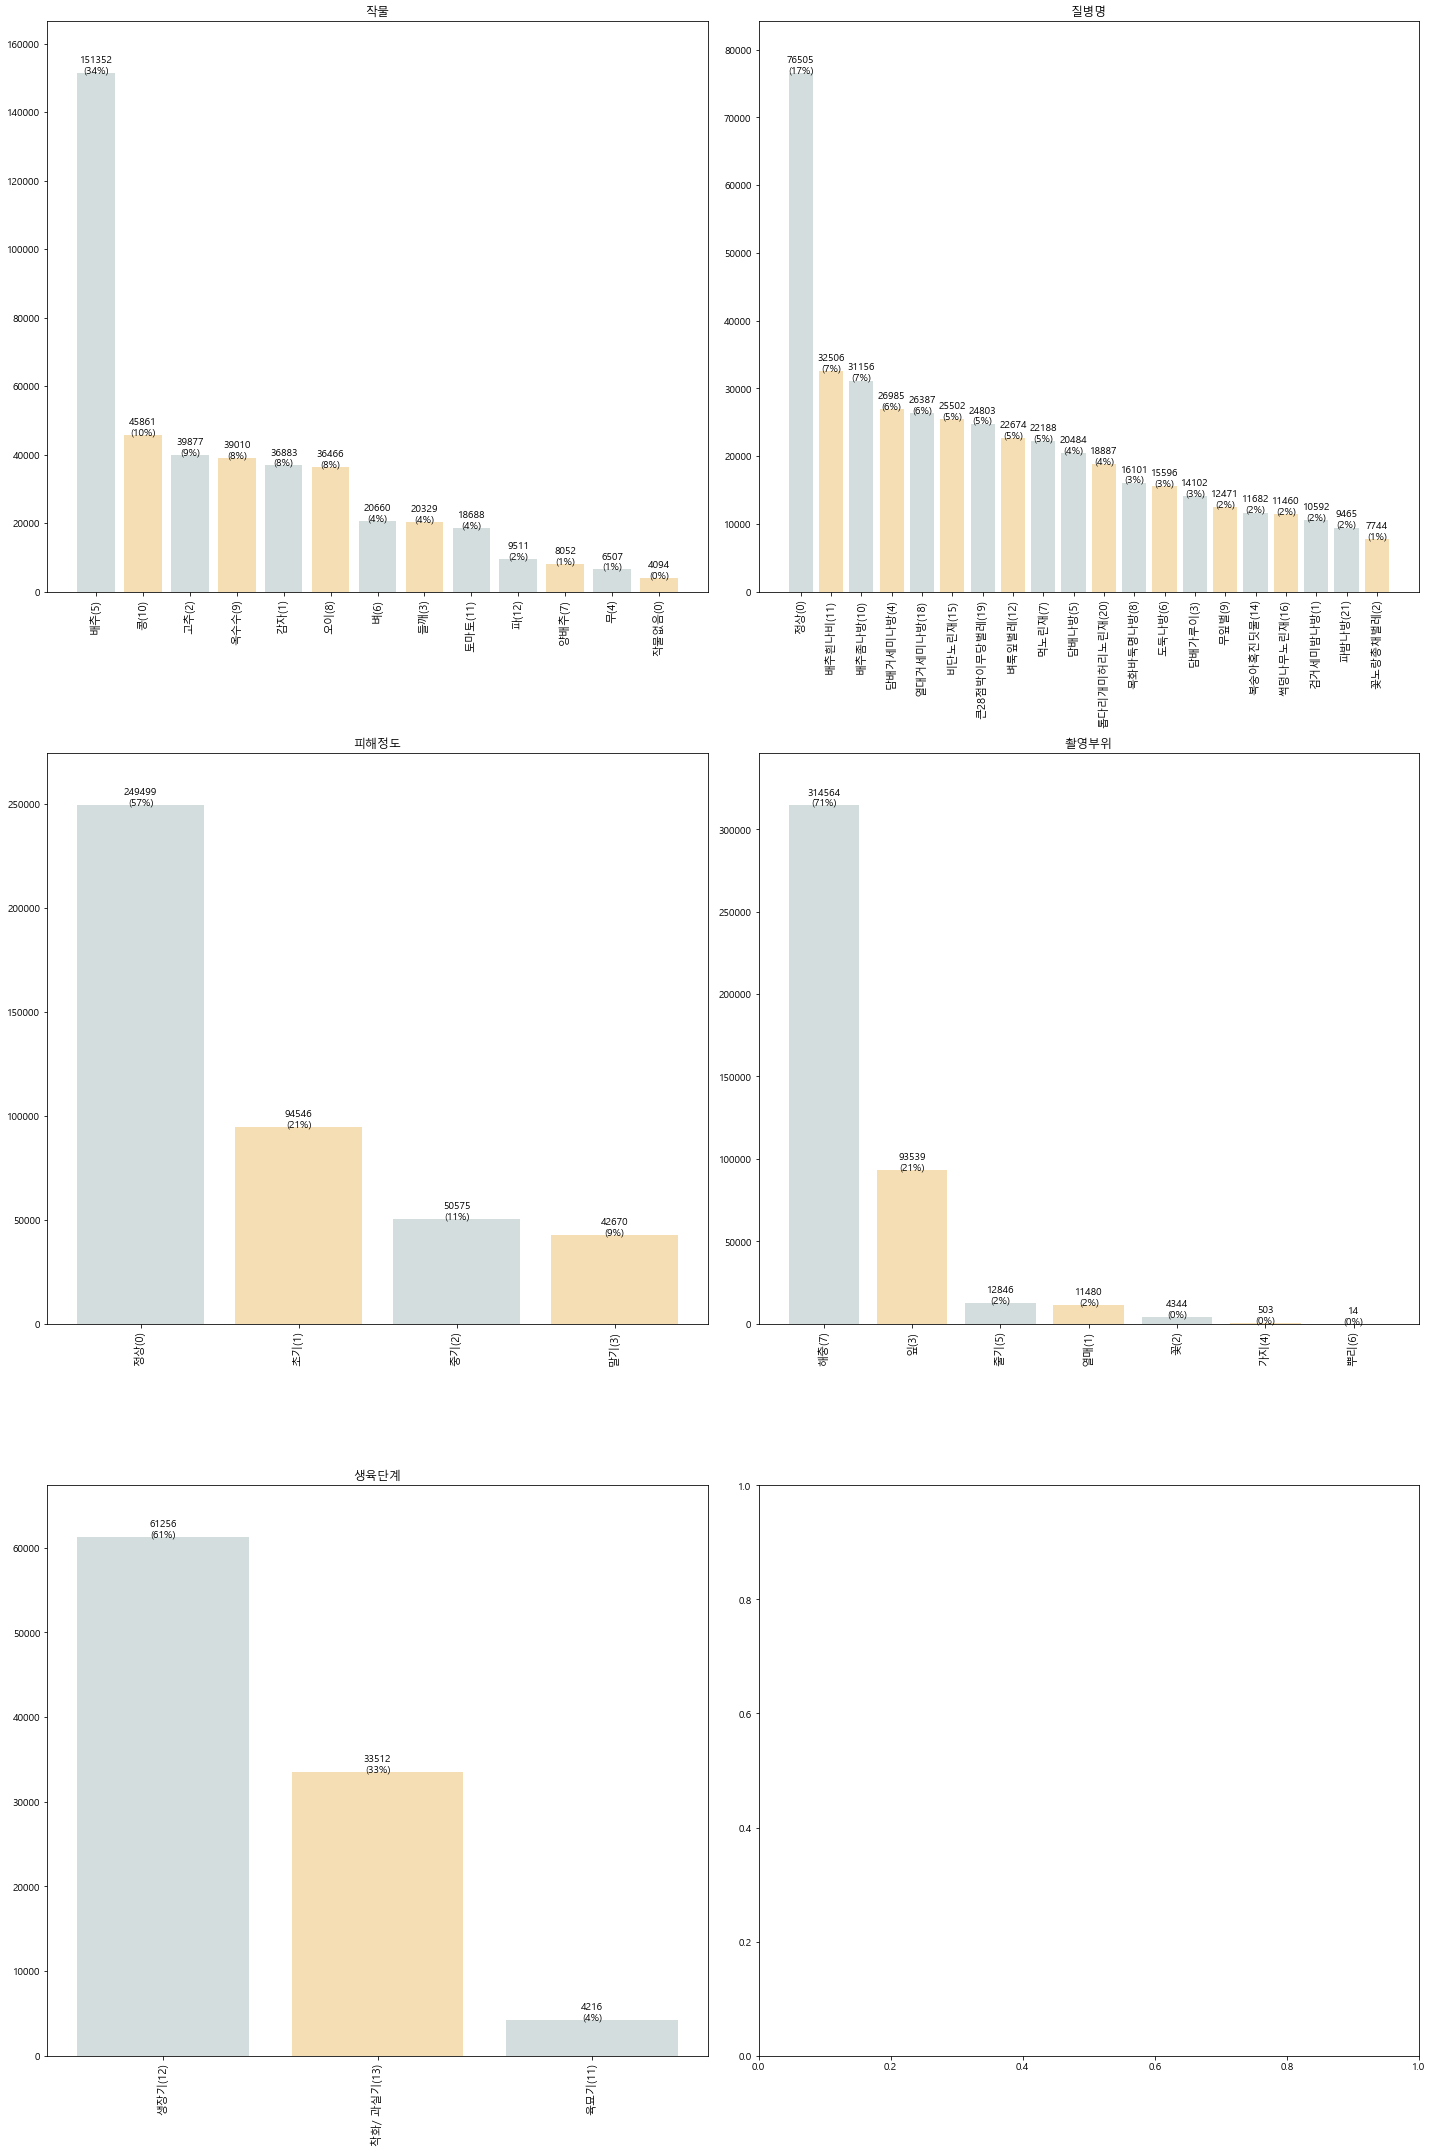

In [63]:
# Train
f, axs = plt.subplots(3,2,figsize=(20,30))
axs = axs.flatten()
for i, col in enumerate(['작물', '질병명', '피해정도', '촬영부위', '생육단계']):
    object_cnt = tr_json_df[col].value_counts().sort_values(ascending=False)
    axs[i].bar(object_cnt.index, object_cnt.values, color=['#d4dddd' if i%2==0 else '#F5DEB3' for i in range(9)])
    for x,y,z in zip(object_cnt.index, object_cnt.values,object_cnt.values/object_cnt.sum()*100):                                       # <--
        axs[i].annotate('%d\n(%d%%)' %(int(y),z), xy=(x,y+70), textcoords='data', ha = 'center') 
    axs[i].axis(ymin=0,ymax=int(max(object_cnt)*1.1))
    axs[i].set_xticklabels(object_cnt.index, rotation = 90, fontsize = 11)
    axs[i].set_title(col) 
f.tight_layout()
# plt.show()
plt.savefig('./Class분포도_노지해충_train.png')

In [88]:
import collections

collections.Counter(tr_json_df_vd['label_name'])

Counter({'작물없음(0)_꽃노랑총채벌레(2)_정상(0)': 285,
         '작물없음(0)_꽃노랑총채벌레(2)_초기(1)': 2,
         '작물없음(0)_담배거세미나방(4)_정상(0)': 2,
         '작물없음(0)_담배거세미나방(4)_초기(1)': 1,
         '작물없음(0)_담배나방(5)_정상(0)': 24,
         '작물없음(0)_담배나방(5)_말기(3)': 1,
         '작물없음(0)_목화바둑명나방(8)_정상(0)': 34,
         '작물없음(0)_배추흰나비(11)_초기(1)': 1,
         '작물없음(0)_배추흰나비(11)_정상(0)': 2,
         '작물없음(0)_큰28점박이무당벌레(19)_정상(0)': 28,
         '작물없음(0)_큰28점박이무당벌레(19)_초기(1)': 8,
         '작물없음(0)_파밤나방(21)_정상(0)': 34,
         '작물없음(0)_파밤나방(21)_초기(1)': 2,
         '감자(1)_큰28점박이무당벌레(19)_말기(3)': 17,
         '감자(1)_큰28점박이무당벌레(19)_초기(1)': 126,
         '감자(1)_큰28점박이무당벌레(19)_중기(2)': 6,
         '감자(1)_큰28점박이무당벌레(19)_정상(0)': 15,
         '감자(1)_파밤나방(21)_정상(0)': 122,
         '감자(1)_파밤나방(21)_초기(1)': 35,
         '고추(2)_정상(0)_정상(0)': 299,
         '고추(2)_담배거세미나방(4)_정상(0)': 154,
         '고추(2)_담배거세미나방(4)_초기(1)': 33,
         '고추(2)_담배나방(5)_초기(1)': 418,
         '고추(2)_담배나방(5)_중기(2)': 44,
         '고추(2)_담배나방(5)_말기(3)': 737,
       

In [81]:
tr_json_df_vd['label_name'].nunique()

62

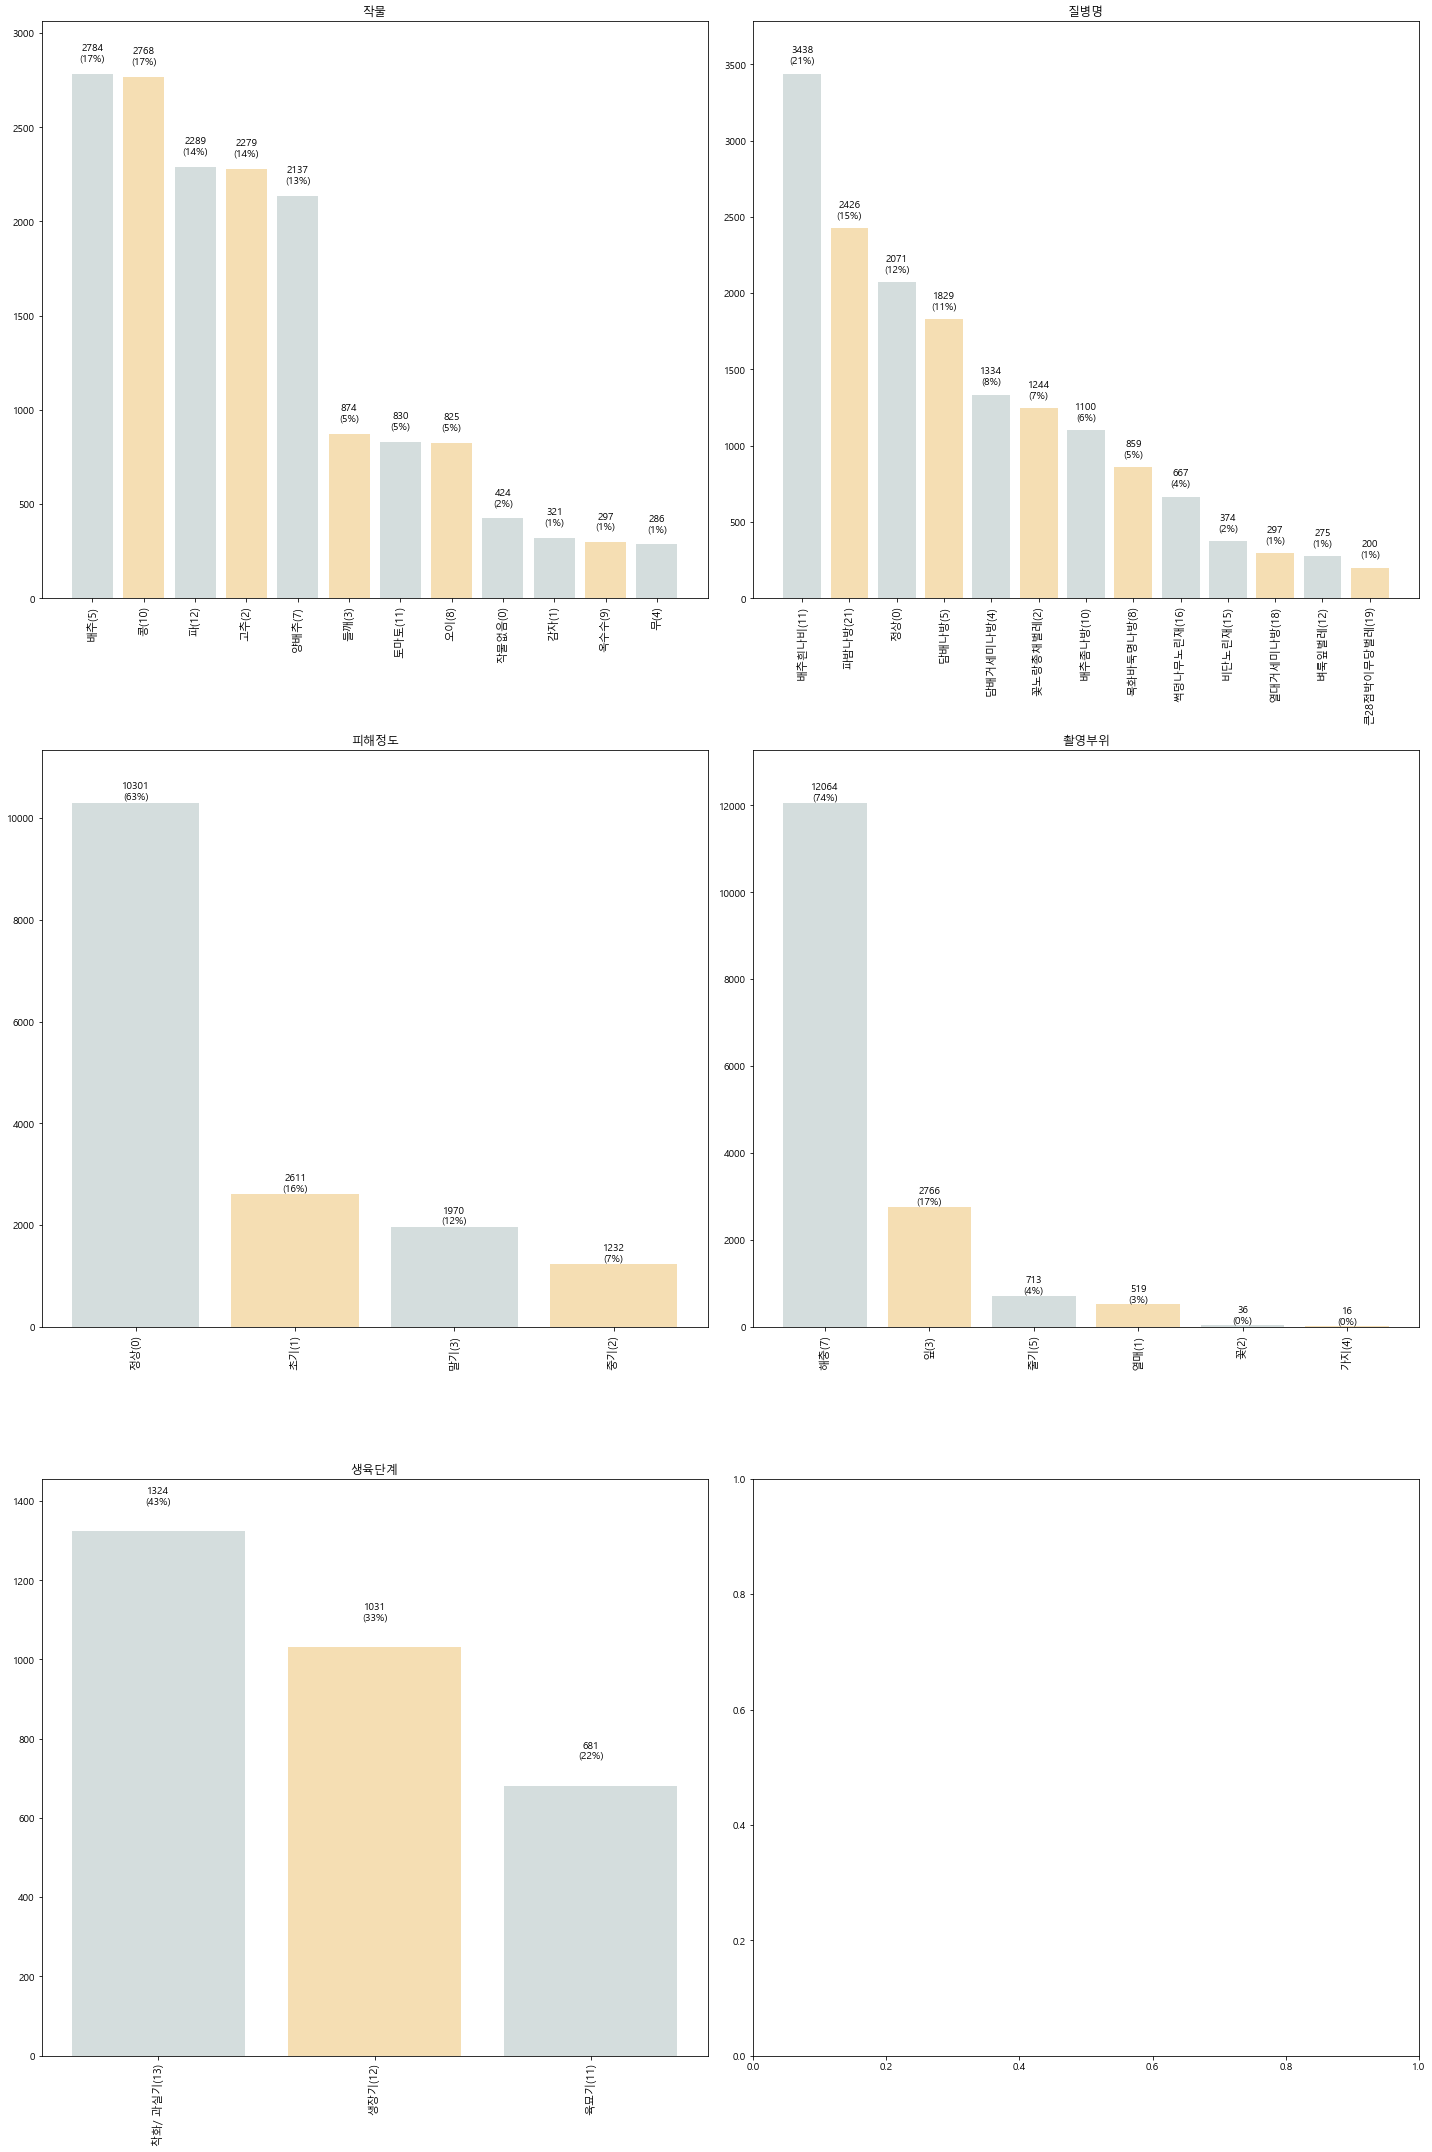

In [64]:
# Valid
f, axs = plt.subplots(3,2,figsize=(20,30))
axs = axs.flatten()
for i, col in enumerate(['작물', '질병명', '피해정도', '촬영부위', '생육단계']):
    object_cnt = tr_json_df_vd[col].value_counts().sort_values(ascending=False)
    axs[i].bar(object_cnt.index, object_cnt.values, color=['#d4dddd' if i%2==0 else '#F5DEB3' for i in range(9)])
    for x,y,z in zip(object_cnt.index, object_cnt.values,object_cnt.values/object_cnt.sum()*100):                                       # <--
        axs[i].annotate('%d\n(%d%%)' %(int(y),z), xy=(x,y+70), textcoords='data', ha = 'center') 
    axs[i].axis(ymin=0,ymax=int(max(object_cnt)*1.1))
    axs[i].set_xticklabels(object_cnt.index, rotation = 90, fontsize = 11)
    axs[i].set_title(col) 
f.tight_layout()
# plt.show()
plt.savefig('./Class분포도_노지해충_valid.png')

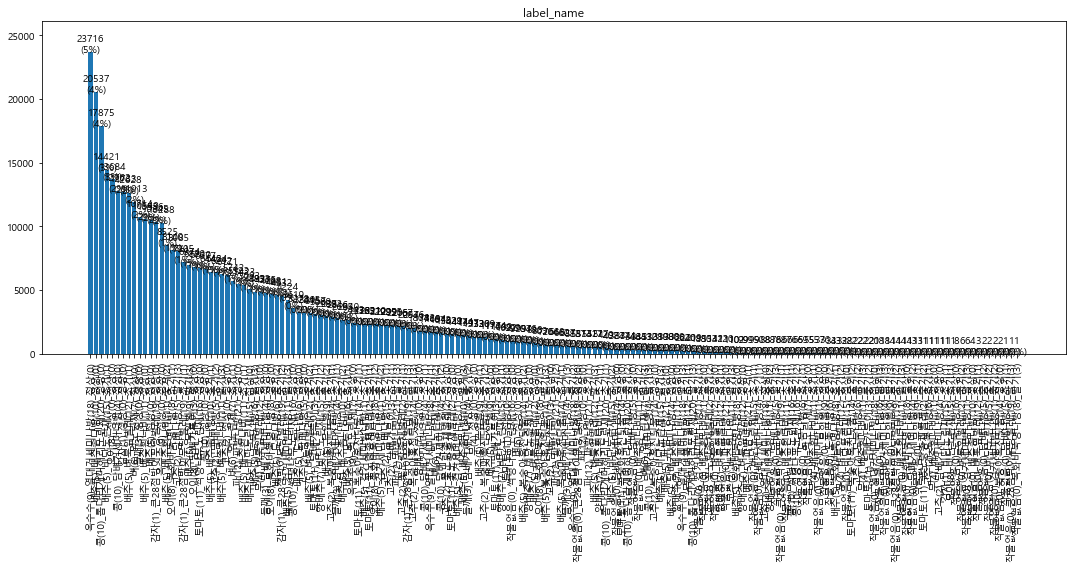

In [65]:
# Train
f, axs = plt.subplots(1,1,figsize=(15,8))
# axs = axs.flatten()
for i, col in enumerate(['label_name']):
    object_cnt = tr_json_df[col].value_counts().sort_values(ascending=False)
    axs.bar(object_cnt.index, object_cnt.values)
    for x,y,z in zip(object_cnt.index, object_cnt.values,object_cnt.values/object_cnt.sum()*100):                                       # <--
        axs.annotate('%d\n(%d%%)' %(int(y),z), xy=(x,y+30), textcoords='data', ha = 'center') 
    axs.axis(ymin=0,ymax=int(max(object_cnt)*1.1))
    axs.set_xticklabels(object_cnt.index, rotation = 90)
    axs.set_title(col)
f.tight_layout()
# plt.show()
plt.savefig('./label_name분포도_노지해충_Train')

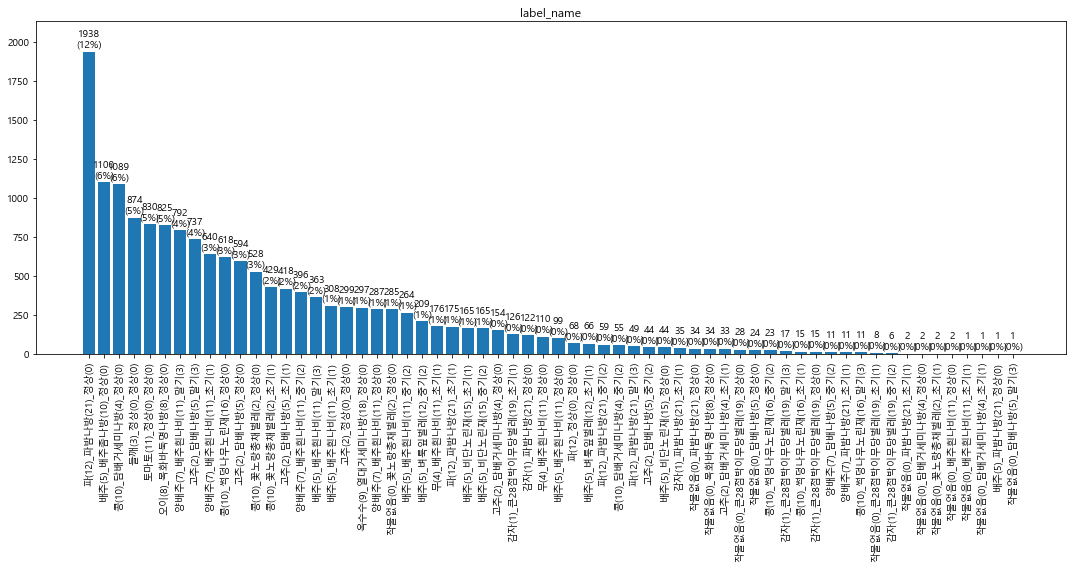

In [66]:
# Valid
f, axs = plt.subplots(1,1,figsize=(15,8))
# axs = axs.flatten()
for i, col in enumerate(['label_name']):
    object_cnt = tr_json_df_vd[col].value_counts().sort_values(ascending=False)
    axs.bar(object_cnt.index, object_cnt.values)
    for x,y,z in zip(object_cnt.index, object_cnt.values,object_cnt.values/object_cnt.sum()*100):                                       # <--
        axs.annotate('%d\n(%d%%)' %(int(y),z), xy=(x,y+30), textcoords='data', ha = 'center') 
    axs.axis(ymin=0,ymax=int(max(object_cnt)*1.1))
    axs.set_xticklabels(object_cnt.index, rotation = 90)
    axs.set_title(col)
f.tight_layout()
# plt.show()
plt.savefig('./label_name분포도_노지해충_valid')

# 각 Class 별 관계도
## 작물 / 질병 / 피해정도 관계 비교

In [67]:
# Train
tmp = tr_json_df.groupby('작물')['질병명'].value_counts().rename('cnt').reset_index()
tmp2 = tr_json_df.groupby(['질병명'])['피해정도'].value_counts().rename('cnt').reset_index()

i = 0
tmp_dict = {}
for c_list in [tmp['작물'].unique(), tmp['질병명'].unique(), tmp2['피해정도'].unique()]:
    for x in c_list:
        tmp_dict[x] = i
        i+=1 

# Valid
tmp_vd = tr_json_df_vd.groupby('작물')['질병명'].value_counts().rename('cnt').reset_index()
tmp2_vd = tr_json_df_vd.groupby(['질병명'])['피해정도'].value_counts().rename('cnt').reset_index()

i = 0
tmp_dict_vd = {}
for c_list in [tmp_vd['작물'].unique(), tmp_vd['질병명'].unique(), tmp2_vd['피해정도'].unique()]:
    for x in c_list:
        tmp_dict_vd[x] = i
        i+=1

In [69]:
import plotly.io as pio
pio.renderers.default = "notebook_connected" 

NODES = dict(
label = list(tmp_dict.keys()),
)
LINKS = dict(source = list(tmp['작물'].map(tmp_dict).values) + list(tmp2['질병명'].map(tmp_dict).values), 
target = list(tmp['질병명'].map(tmp_dict).values) + list(tmp2['피해정도'].map(tmp_dict).values),
value =  list(tmp['cnt'].values) + list(tmp2['cnt'].values), 
)
data = go.Sankey(node = NODES, link = LINKS)
fig = go.Figure(data)
fig.show()
fig.write_html('작물_질병_피해정도관계_노지해충_train.html')

In [70]:
NODES = dict(
label = list(tmp_dict_vd.keys()),
)
LINKS = dict(source = list(tmp_vd['작물'].map(tmp_dict_vd).values) + list(tmp2_vd['질병명'].map(tmp_dict_vd).values), 
target = list(tmp_vd['질병명'].map(tmp_dict_vd).values) + list(tmp2_vd['피해정도'].map(tmp_dict_vd).values),
value =  list(tmp_vd['cnt'].values) + list(tmp2_vd['cnt'].values), 
)
data = go.Sankey(node = NODES, link = LINKS)
fig = go.Figure(data)
fig.show()
fig.write_html('작물_질병_피해정도관계_노지해충_valid.html')

In [77]:
# Train
tmp = tr_json_df.groupby('작물')['촬영부위'].value_counts().rename('cnt').reset_index()
tmp2 = tr_json_df.groupby(['촬영부위'])['질병명'].value_counts().rename('cnt').reset_index()

i = 0
tmp_dict = {}
for c_list in [tmp['작물'].unique(), tmp['촬영부위'].unique(), tmp2['질병명'].unique()]:
    for x in c_list:
        tmp_dict[x] = i
        i+=1 
        
NODES = dict(
label = list(tmp_dict.keys()),
)
LINKS = dict(source = list(tmp['작물'].map(tmp_dict).values) + list(tmp2['촬영부위'].map(tmp_dict).values), 
target = list(tmp['촬영부위'].map(tmp_dict).values) + list(tmp2['질병명'].map(tmp_dict).values), 
value =  list(tmp['cnt'].values) + list(tmp2['cnt'].values), 
)
data = go.Sankey(node = NODES, link = LINKS)
fig = go.Figure(data)
fig.show()
fig.write_html('작물_촬영부위_질병관계_노지해충_train.html')

In [78]:
# Valid
tmp_vd = tr_json_df_vd.groupby('작물')['촬영부위'].value_counts().rename('cnt').reset_index()
tmp2_vd = tr_json_df_vd.groupby(['촬영부위'])['질병명'].value_counts().rename('cnt').reset_index()

i = 0
tmp_dict_vd = {}
for c_list in [tmp_vd['작물'].unique(), tmp_vd['촬영부위'].unique(), tmp2_vd['질병명'].unique()]:
    for x in c_list:
        tmp_dict_vd[x] = i
        i+=1 
        
NODES = dict(
label = list(tmp_dict_vd.keys()),
)
LINKS = dict(source = list(tmp_vd['작물'].map(tmp_dict_vd).values) + list(tmp2_vd['촬영부위'].map(tmp_dict_vd).values), 
target = list(tmp_vd['촬영부위'].map(tmp_dict_vd).values) + list(tmp2_vd['질병명'].map(tmp_dict_vd).values), 
value =  list(tmp_vd['cnt'].values) + list(tmp2_vd['cnt'].values), 
)
data = go.Sankey(node = NODES, link = LINKS)
fig = go.Figure(data)
fig.show()
fig.write_html('작물_촬영부위_질병관계_노지해충_valid.html')